
# Loading and Visualizing GPX Tracks in Google Colab

In this section, we will learn how to load and visualize a GPX (GPS Exchange Format) file in a Google Colab notebook. GPX files are commonly used to store GPS data such as tracks, routes, and waypoints. By the end of this section, you will be able to visualize the path of a GPX file on a map.

We will follow these steps:

1. **Install Necessary Libraries**: We need to install `gpxpy` for parsing GPX files, and `geopandas` and `matplotlib` for visualizing the data.
2. **Mount Google Drive**: To access files stored on Google Drive.
3. **Load and Parse the GPX File**: Read the GPX file and extract the track points.
4. **Visualize the GPX Track**: Plot the extracted track points on a map.



### Step 1: Install Necessary Libraries

We need to install three libraries to proceed with our task:

1. **gpxpy**: A Python library for parsing GPX files. This library allows us to read and manipulate GPX data easily. You can find more information about `gpxpy` on its [GitHub repository](https://github.com/tkrajina/gpxpy).

2. **geopandas**: An open-source library that simplifies working with geospatial data in Python. It extends the datatypes used by `pandas` to allow spatial operations on geometric types. More details can be found on the [GeoPandas website](https://geopandas.org/).

3. **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. We will use it to plot the GPS data points on a map. Visit the [Matplotlib website](https://matplotlib.org/) for more information.

To install these libraries, run the following command:

In [ ]:
!pip install gpxpy geopandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 638.9 kB/s eta 0:00:00


2. **Mount Google Drive**: To access files stored on Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



###  Step 2: Load and Parse the GPX File**

In this step, we will load the GPX file from Google Drive and parse it to extract the GPS track points. We will use the `gpxpy` library for parsing the GPX file and `geopandas` for handling the geospatial data.

First, let's import the necessary libraries:

In [ ]:
import gpxpy
import gpxpy.gpx
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to the GPX file
gpx_file_path = '/content/drive/MyDrive/GPX/SampleGPX.gpx'

# Load the GPX file
with open(gpx_file_path, 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)



In this sub-step, we will extract the track points from the GPX file. Each track in a GPX file can contain multiple segments, and each segment can have multiple points. We will iterate through these structures to collect all the track points (latitude and longitude).

Let's write the code to extract the track points:


In [ ]:
# Extract track points
tracks = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            tracks.append([point.longitude, point.latitude])

### Step 3: Create a GeoDataFrame and Visualize the GPX Track

In this sub-step, we will create a `GeoDataFrame` using the extracted track points and visualize the GPX track using `geopandas` and `matplotlib`.

First, let's create a `GeoDataFrame` from the track points:

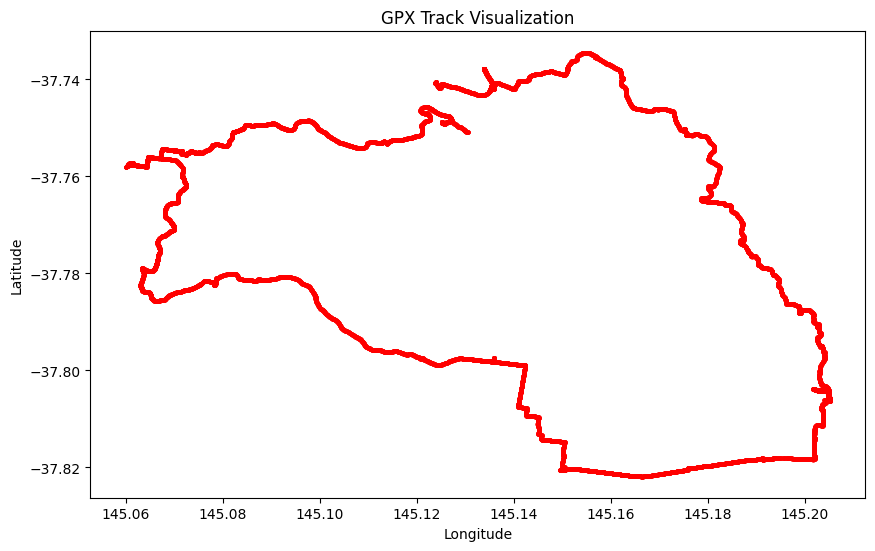

In [ ]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(tracks, columns=['Longitude', 'Latitude'], geometry=gpd.points_from_xy([p[0] for p in tracks], [p[1] for p in tracks]))

# Visualize the GPX track
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('GPX Track Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
! pip install folium

## 4- Visualizing GPX Track Points with Folium

To visualize the track points from your GPX file on a map, you can use the `folium` library. Below is an example of how to create a folium map centered around the first track point and add the track points as a polyline to the map.
Folium is a powerful Python library used for creating interactive maps. It builds on the capabilities of the JavaScript library Leaflet.js, providing an easy-to-use interface for visualizing geographic data in Python. Folium allows you to create maps with a wide variety of features, such as markers, lines, polygons, and other geospatial data. It is particularly useful for data scientists and analysts who need to visualize spatial data in a web-based format.

### Key Features of [Folium](https://python-visualization.github.io/folium/latest/)

- **Ease of Use**: Folium provides a straightforward API that simplifies the process of creating maps and adding different types of data layers.
- **Interactivity**: The maps created with Folium are interactive, allowing users to zoom, pan, and click on map elements for more information.
- **Integration with Data Science Tools**: Folium can be easily integrated with other data science tools and libraries, such as pandas and Jupyter notebooks, making it a versatile tool for data analysis and visualization.
- **Customizable**: Folium offers a wide range of customization options for map elements, including colors, popups, and styles, enabling users to tailor the maps to their specific needs.



In [ ]:
import folium

# Create a folium map centered around the first track point
m = folium.Map(location=[tracks[0][1], tracks[0][0]], zoom_start=11, width=600, height = 400)

# Add the track points to the map
folium.PolyLine([(point[1], point[0]) for point in tracks], color='red').add_to(m)

# Display the map
m


# Mode Detection

In this section, we will detect the mode of transportation based on the track points from a GPX file. This requires installing necessary libraries and performing calculations on the data.

### 1. Install Required Libraries

First, we need to install the `ezgpx` and `geopy` libraries.
`ezgpx` will be used for data loading and conversion. `geopy` will be used for calculation of distance from geographic coordiante systems.

In [ ]:
!pip install ezgpx geopy

### 2. Read GPX File and Convert to DataFrame

We will use the `ezgpx` library to read the GPX file and convert it into a pandas DataFrame for further processing.


In [ ]:
import ezgpx
gpx = ezgpx.GPX(gpx_file_path)
df = gpx.to_dataframe()
df

,lat,lon,ele,time
0,-37.758132,145.060026,64.2,2024-05-25 22:09:20+00:00
1,-37.758106,145.060061,64.0,2024-05-25 22:09:21+00:00
2,-37.758078,145.060097,63.6,2024-05-25 22:09:22+00:00
3,-37.758047,145.060128,63.4,2024-05-25 22:09:23+00:00
4,-37.758017,145.060160,63.2,2024-05-25 22:09:24+00:00
...,...,...,...,...
11036,-37.757867,145.060361,60.0,2024-05-26 02:28:57+00:00
11037,-37.757919,145.060307,60.2,2024-05-26 02:28:58+00:00
11038,-37.757939,145.060288,60.4,2024-05-26 02:28:59+00:00
11039,-37.757956,145.060282,60.4,2024-05-26 02:29:00+00:00


## Mode Detection from GPX Data

In this section, we will calculate the average speed from a GPX file and classify the mode of transportation based on the calculated speed. We will use the `ezgpx` library to read the GPX file, the `geopy` library to calculate distances, and pandas for data manipulation.



In [ ]:
import os
import ezgpx
from geopy.distance import geodesic
import pandas as pd


def calculate_average_speed(gpx_file_path):
    gpx = ezgpx.GPX(gpx_file_path)
    df = gpx.to_dataframe()

    # Ensure the DataFrame is sorted by time
    df = df.sort_values(by='time')

    total_distance = 0.0
    total_time = 0.0

    # Calculate the distance and time differences
    for i in range(1, len(df)):
        point1 = df.iloc[i - 1]
        point2 = df.iloc[i]

        # Calculate distance between two points
        distance = geodesic((point1['lat'], point1['lon']), (point2['lat'], point2['lon'])).meters
        total_distance += distance

        # Calculate time difference in seconds
        time_diff = (pd.to_datetime(point2['time']) - pd.to_datetime(point1['time'])).total_seconds()
        total_time += time_diff

    if total_time > 0:
        average_speed = total_distance / total_time  # speed in meters per second
        return average_speed * 3.6  # convert to km/h
    else:
        return 0


def classify_mode(average_speed):
    if average_speed < 5:
        return 'Walking'
    elif 5 <= average_speed < 15:
        return 'Running'
    elif 15 <= average_speed < 25:
        return 'Cycling'
    else:
        return 'Driving'


###Process Multiple GPX Files in a Folder

We will define a function to process all GPX, KML, and KMZ files in a specified folder. This function will calculate the average speed and classify the mode of transportation for each file.


In [ ]:
def process_gpx_files_in_folder(folder_path):
    mode_detection_results = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.gpx') or file_name.endswith('.kml') or file_name.endswith('.kmz'):
            file_path = os.path.join(folder_path, file_name)
            average_speed = calculate_average_speed(file_path)
            mode = classify_mode(average_speed)
            mode_detection_results.append((file_name, average_speed, mode))

    return mode_detection_results

# Define the path to the GPX folder in Google Drive
gpx_folder_path = '/content/drive/MyDrive/GPX'

# Process all GPX files in the folder
results = process_gpx_files_in_folder(gpx_folder_path)

# Display the results
for result in results:
    print(f"File: {result[0]}, Average Speed: {result[1]:.2f} km/h, Mode: {result[2]}")


File: SampleGPX.gpx, Average Speed: 12.19 km/h, Mode: Running
File: Morning_Ride (3).gpx, Average Speed: 15.67 km/h, Mode: Cycling
